# `Step 7: Decision | Clusters | Annotations`

# 0- `Config`


In [1]:
try: 
    if manager == 1: 
        print("Manager Mode: ON")
except:
    print("Manager Mode: OFF")
    %run s0_config.ipynb 

Manager Mode: OFF


/Users/mac/Documents/Thesis/main/bilimnn/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.10.1 anndata==0.10.7 umap==0.5.6 numpy==1.26.4 scipy==1.13.1 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.12


# 1- `Load` 

## 1-) `Data`

In [2]:
#check_point_s1    = "checkpoint/session_s1.h5ad"
#check_point_s2    = "checkpoint/session_s2.h5ad"
#check_point_s3    = "checkpoint/session_s3.h5ad"
#check_point_s4    = "checkpoint/session_s4.h5ad"
#check_point_s5    = "checkpoint/session_s5.h5ad"
#check_point_s6    = "checkpoint/session_s6.h5ad"
#check_point_s7    = "checkpoint/session_s7.h5ad"
#check_point_s8    = "checkpoint/session_s8.h5ad"
#check_point_s9    = "checkpoint/session_s9.h5ad"

adata = sc.read(check_point_s5)   

In [3]:
adata 

AnnData object with n_obs × n_vars = 23937 × 2322
    obs: 'Source', 'GEX_region', 'cluster', 'cluster_source', 'minor_subset', 'minor_subset_source', 'major_subset', 'major_subset_source', 'cell_type_source', 'donor_id', 'scRNASeq_sample_ID', 'Age', 'Hospitalstay', 'TimeSinceOnset', 'QC_ngenes', 'QC_total_UMI', 'QC_pct_mitochondrial', 'QC_scrub_doublet_scores', 'TCR_clone_count', 'TCR_clone_proportion', 'BCR_total_mut_HC', 'BCR_clonal_abundance_HC', 'BCR_total_mut_LC', 'assay_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'cell_type_original', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'organism_ontology_term_id', 'is_primary_data', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scor

## 2-) `Variables`
- None

In [4]:
import_name = check_point_s5_variables

with open( access_data_path(target_folder = f"process_0/checkpoint", target_file = import_name + ".pkl" ) , 'rb') as file:
    Variables_Dict_s6 = pickle.load(file)   

target_gene_number      = Variables_Dict_s6['target_gene_number']

selected_obs_cluster_key          = Variables_Dict_s6['selected_obs_cluster_key'] 
selected_uns_ranked_key           = Variables_Dict_s6['selected_uns_ranked_key']
selected_cluster_names            = Variables_Dict_s6['selected_cluster_names'] 
selected_sample_cluster_barcode   = Variables_Dict_s6['selected_sample_cluster_barcode'] 

true_label_obs_cluster_key          = Variables_Dict_s6['true_label_obs_cluster_key'] 
true_label_uns_ranked_key           = Variables_Dict_s6['true_label_uns_ranked_key']
true_label_cluster_names            = Variables_Dict_s6['true_label_cluster_names'] 
true_label_sample_cluster_barcode   = Variables_Dict_s6['true_label_sample_cluster_barcode'] 

## 3-) `Functions`

---
# 3- `Bench`

### 1-) `Scanpy Ranked Genes`

#### A-) `Selected`

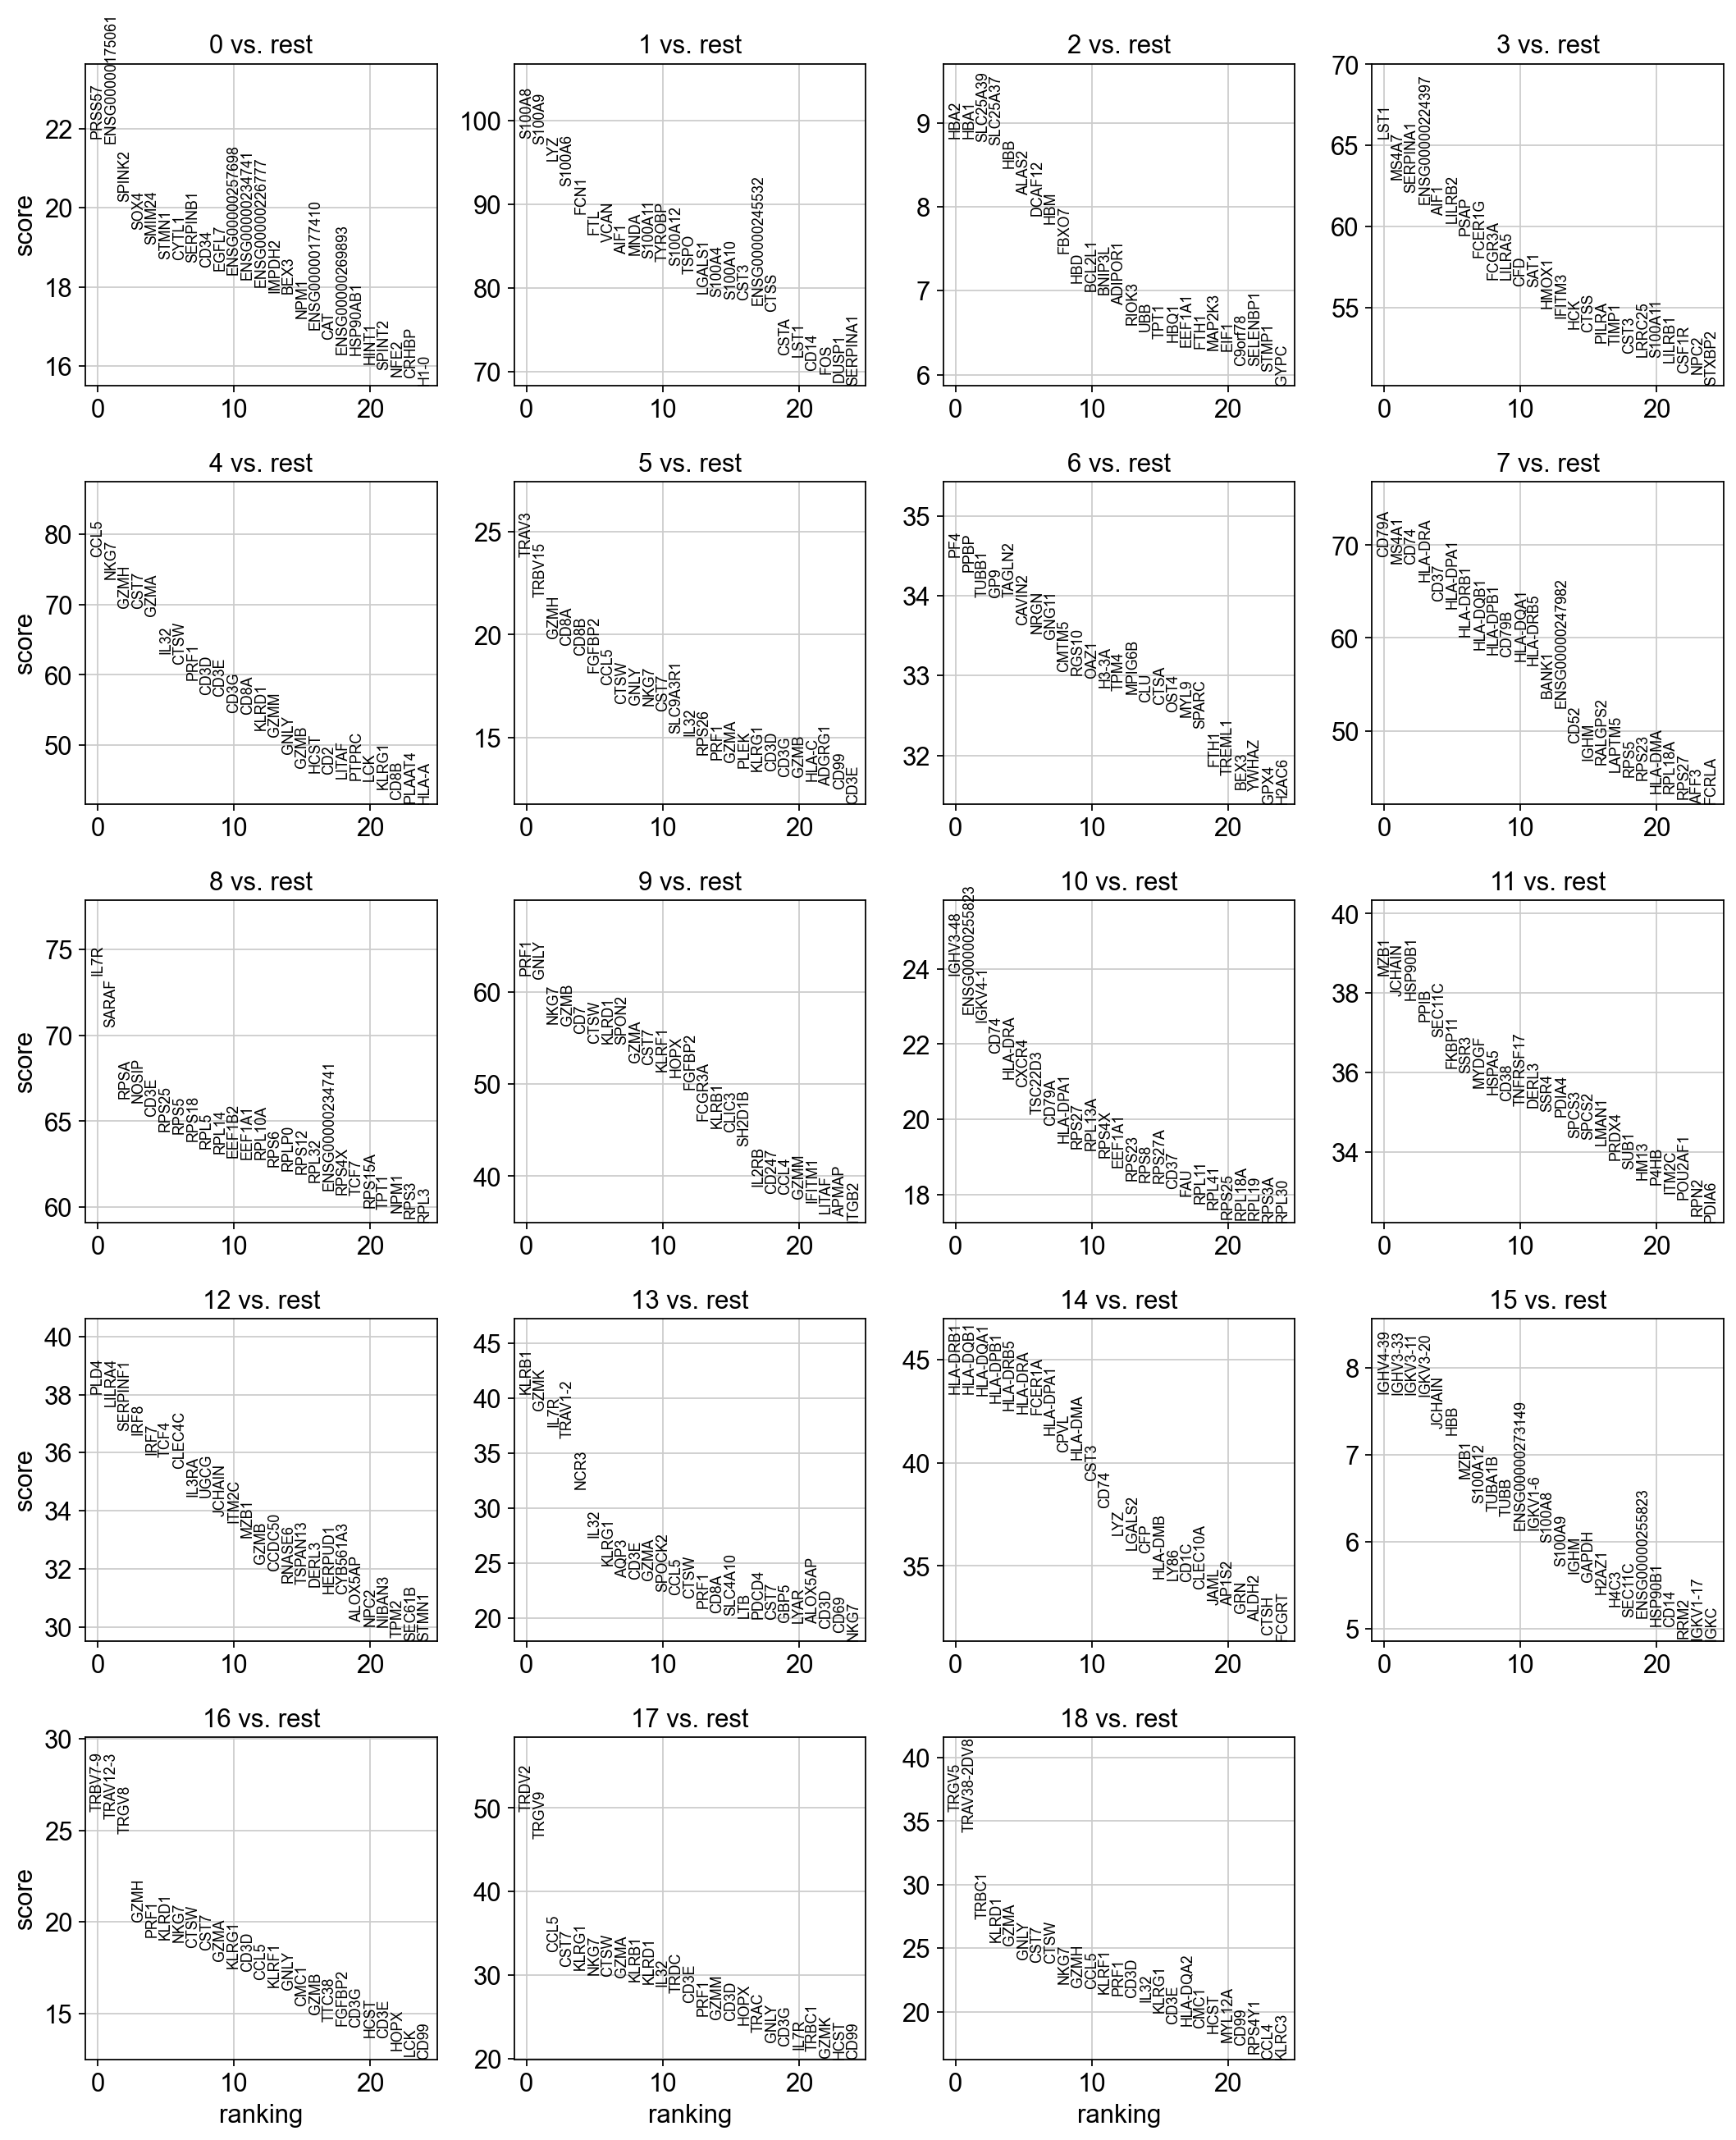

In [5]:
sc.pl.rank_genes_groups(adata, key = selected_uns_ranked_key, n_genes = 25, sharey = False)  

#### B-) `Selected`

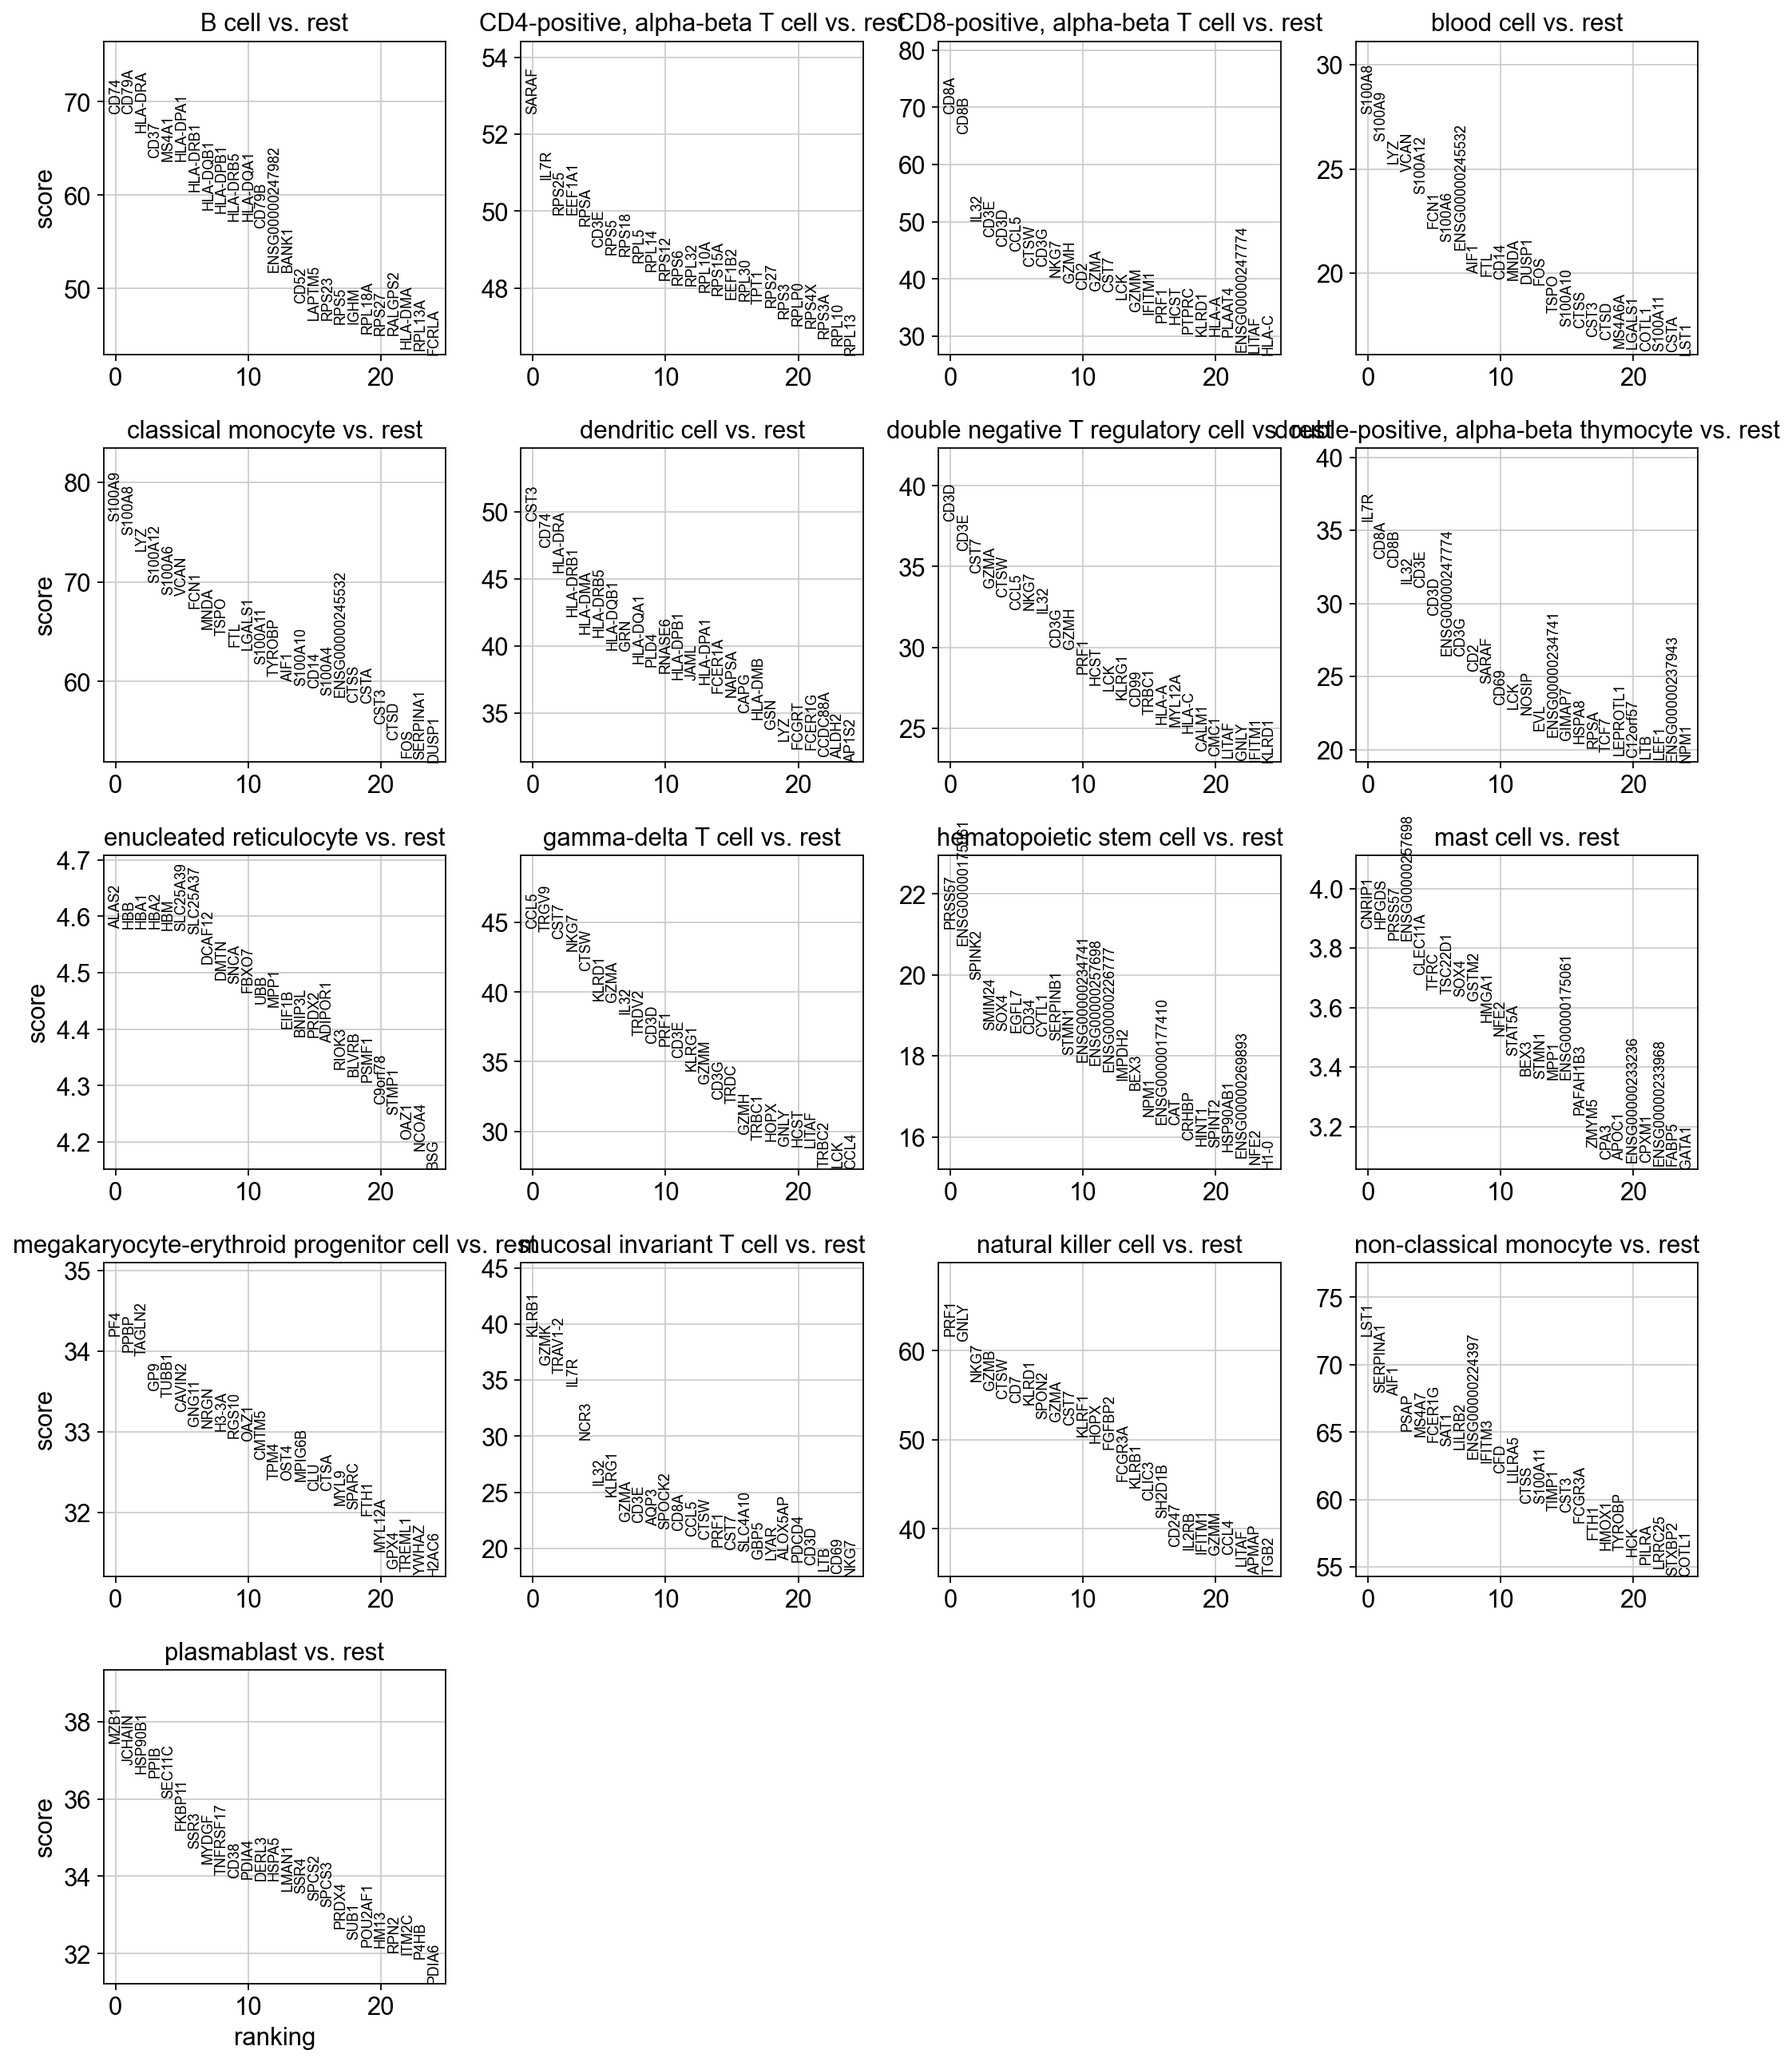

In [6]:
sc.pl.rank_genes_groups(adata, key = true_label_uns_ranked_key, n_genes = 25, sharey = False)  

### 2-) `Cluster Fitting`

scanpy==1.10.1 anndata==0.10.7 umap==0.5.6 numpy==1.26.4 scipy==1.13.1 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.12


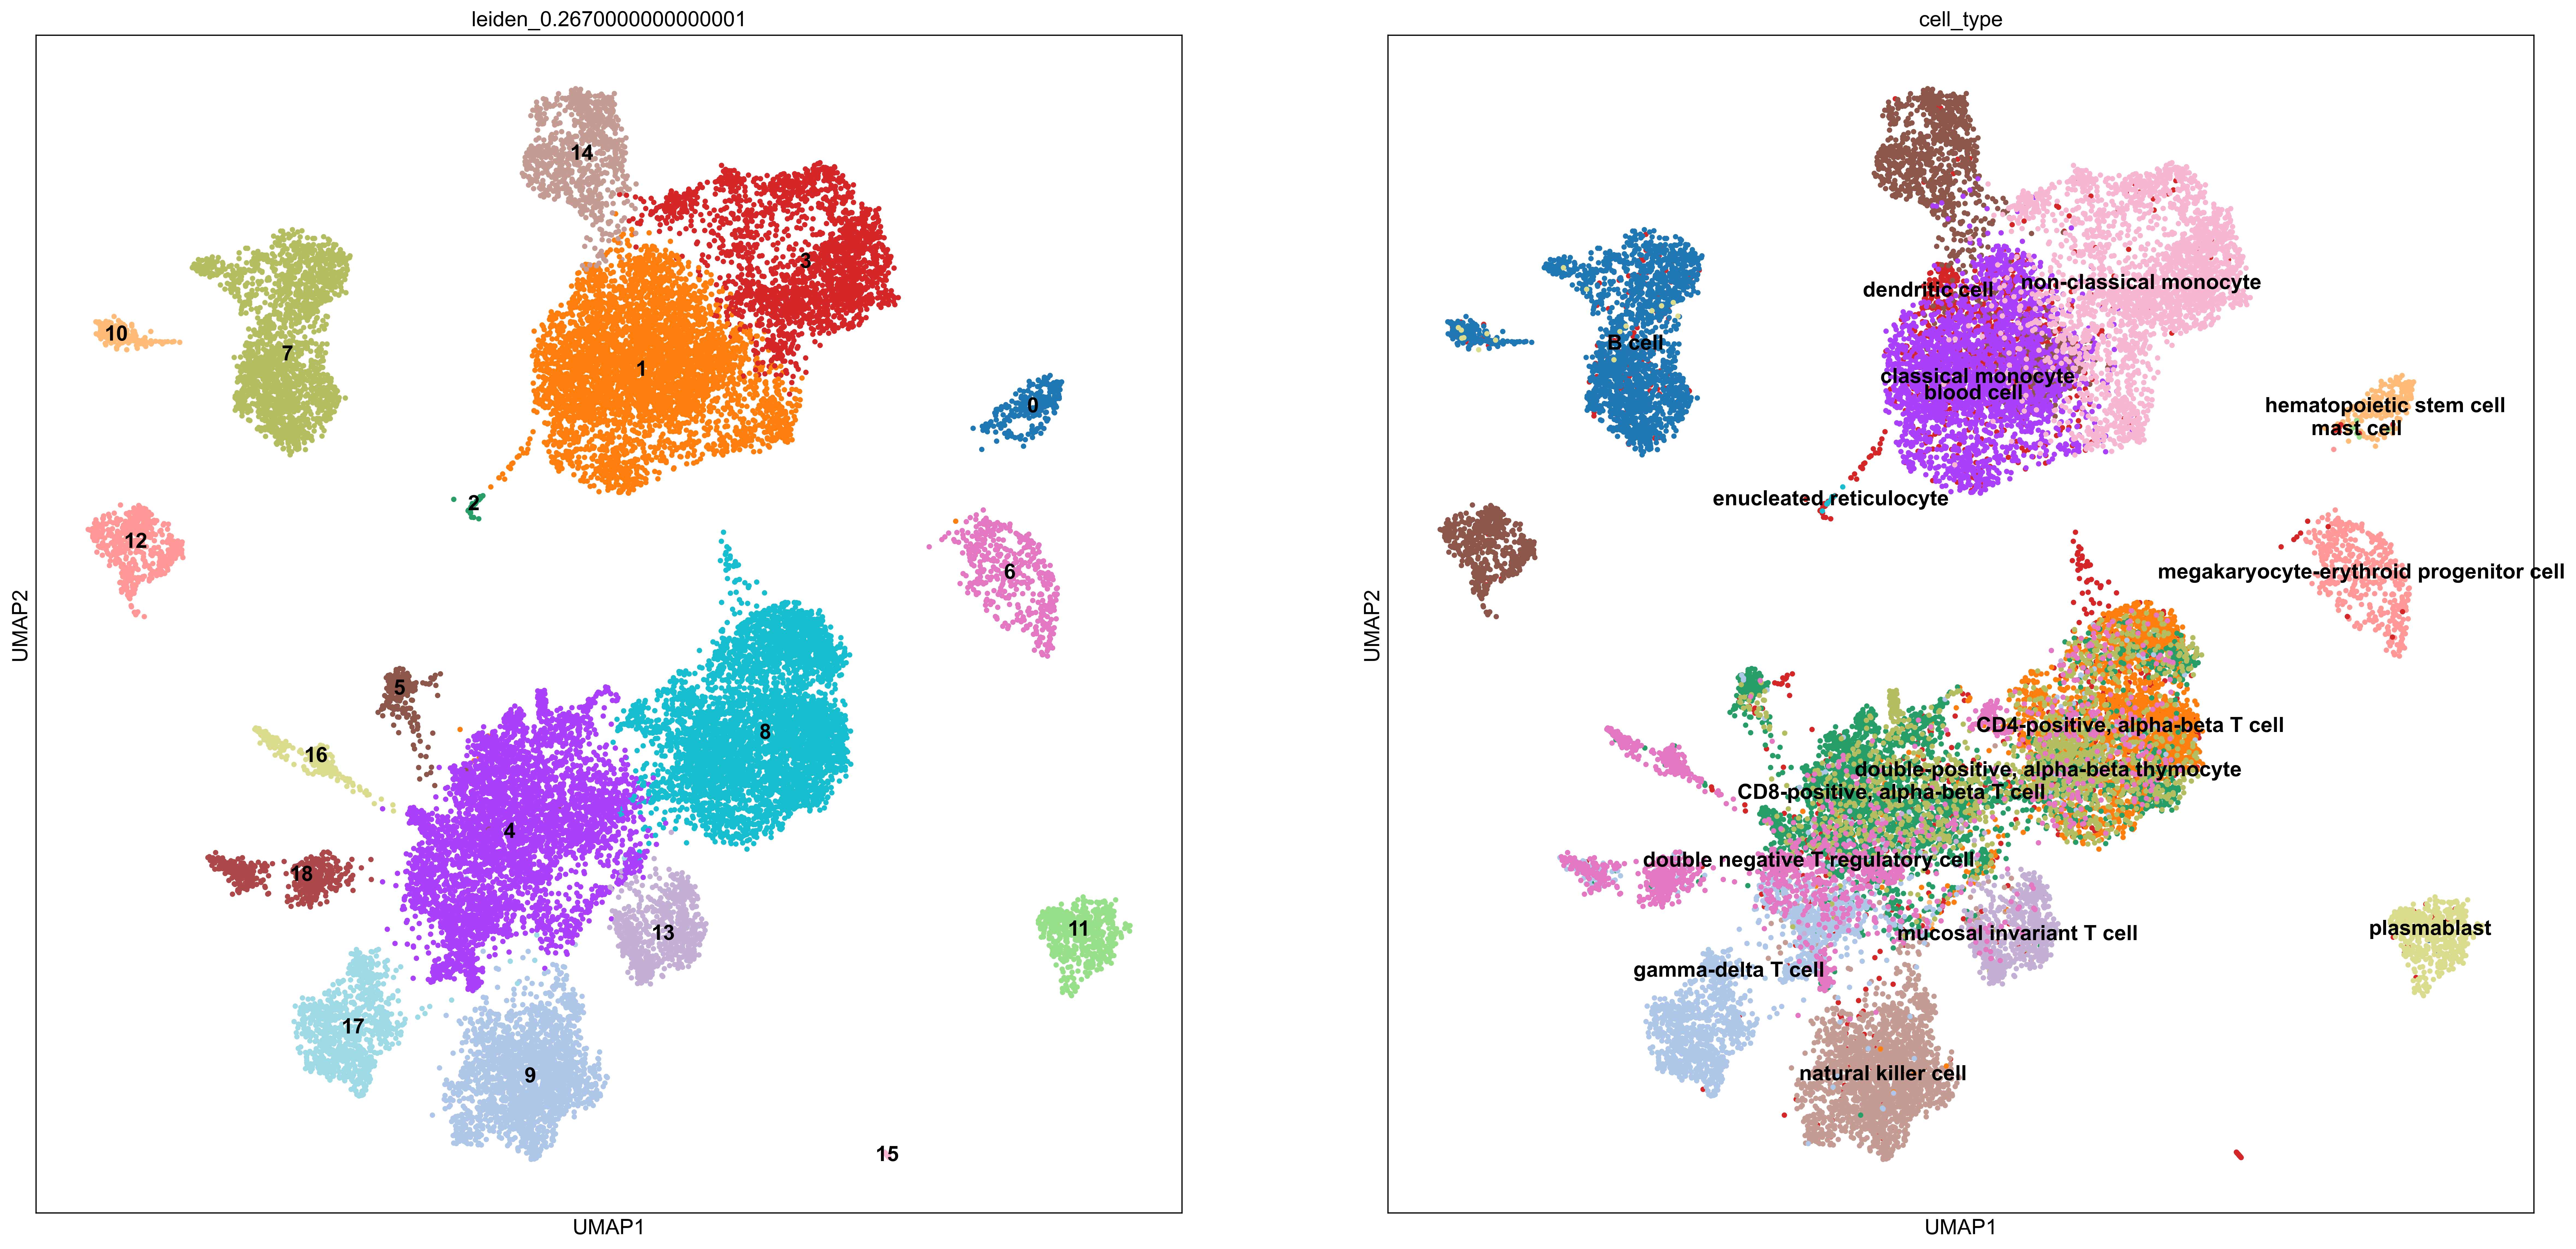

Number of CLusters inselected cluster key: leiden_0.2670000000000001 is :19


In [7]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=200, facecolor="white", figsize=(14, 14))

sc.pl.umap(
    adata, 
    color       = [selected_obs_cluster_key, true_label_obs_cluster_key, 
                   ], 
    legend_loc  = "on data", 
    title       = [selected_obs_cluster_key, true_label_obs_cluster_key, 
                   ], 
    frameon     = True, 
    size = 50
    #save=".pdf"
)
print(f"Number of CLusters inselected cluster key: {selected_obs_cluster_key} is :{adata.obs[selected_obs_cluster_key].nunique()}")

### 3-) `Cluster Naming`

In [8]:
"""# Get Backup 
adata.obs[f"selected_cluster_key{selected_cluster_key}"] = adata.obs[selected_cluster_key] 

new_cluster_names = [
    "CD4 T",
    "B",
    "FCGR3A+ Monocytes",
    "NK",
    "CD8 T",
    "CD14+ Monocytes",
    "Dendritic",
    "Megakaryocytes",
]
adata.rename_categories("New_Annoation", new_cluster_names)
"""

'#\xa0Get Backup \nadata.obs[f"selected_cluster_key{selected_cluster_key}"] = adata.obs[selected_cluster_key] \n\nnew_cluster_names = [\n    "CD4 T",\n    "B",\n    "FCGR3A+ Monocytes",\n    "NK",\n    "CD8 T",\n    "CD14+ Monocytes",\n    "Dendritic",\n    "Megakaryocytes",\n]\nadata.rename_categories("New_Annoation", new_cluster_names)\n'

# `Step 7: Checkpoint` 

#### Operation: Checkpoint (Save) 
Save the result.

In [9]:
adata.write(check_point_s7)

In [10]:
adata

AnnData object with n_obs × n_vars = 23937 × 2322
    obs: 'Source', 'GEX_region', 'cluster', 'cluster_source', 'minor_subset', 'minor_subset_source', 'major_subset', 'major_subset_source', 'cell_type_source', 'donor_id', 'scRNASeq_sample_ID', 'Age', 'Hospitalstay', 'TimeSinceOnset', 'QC_ngenes', 'QC_total_UMI', 'QC_pct_mitochondrial', 'QC_scrub_doublet_scores', 'TCR_clone_count', 'TCR_clone_proportion', 'BCR_total_mut_HC', 'BCR_clonal_abundance_HC', 'BCR_total_mut_LC', 'assay_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'cell_type_original', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'organism_ontology_term_id', 'is_primary_data', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scor

In [11]:
Variables_Dict_s7 ={"target_gene_number"      : target_gene_number, 
                    
                    "selected_obs_cluster_key"           : selected_obs_cluster_key,
                    "selected_uns_ranked_key"            : selected_uns_ranked_key,
                    "selected_cluster_names"             : list(pd.unique(adata.obs[selected_obs_cluster_key])), 
                    "selected_sample_cluster_barcode"    : list(pd.unique(adata.obs[selected_obs_cluster_key]))[0], 
                    

                    "true_label_obs_cluster_key"           : true_label_obs_cluster_key,
                    "true_label_uns_ranked_key"            : true_label_uns_ranked_key,
                    "true_label_cluster_names"             : list(pd.unique(adata.obs[true_label_obs_cluster_key])), 
                    "true_label_sample_cluster_barcode"    : list(pd.unique(adata.obs[true_label_obs_cluster_key]))[0], 
                     }

export_name = check_point_s7_variables

with open( access_data_path(target_folder = f"process_0/checkpoint", target_file = export_name + ".pkl" )  , 'wb') as file:
    pickle.dump(Variables_Dict_s7, file)
